# Import Packages

In [1]:
# Data Exploration

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
# Decision Tree

from sklearn.metrics import precision_recall_fscore_support, accuracy_score, matthews_corrcoef#, plot_confusion_matrix
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Random Forest

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [51]:
# Read in Data
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Data\\DSDP\\"

boston = pd.read_csv(str(filepath)+"Boston.csv")
titanic = pd.read_csv(str(filepath)+"titanic_train.csv")
indians = pd.read_csv(str(filepath)+"PimaIndiansDiabetes.csv")

In [3]:
# Define Columns
boston_Continuous = ['crim','zn','indus','nox','rm','age','dis','tax','ptratio','black','lstat','medv']
boston_Categorical = ['chas','rad']

titanic_Continuous = ['Age','Fare']
titanic_Categorical = ['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked']

indians_Continuous = ['glucose','pressure','triceps','insulin','mass','pedigree','age']
indians_Categorical = ['pregnant','diabetes']

# Data Exploration

#### Table of Contents
1. [Boston](#Boston)
2. [Titanic](#Titanic)
3. [Indian Diabetes](#Indian)

<a id="Boston"></a>
## Boston


In [22]:
df = boston

Column name: crim
Mean
3.6135235573122535
Max
88.9762
Min
0.00632
Standard Deviation
8.601545105332487


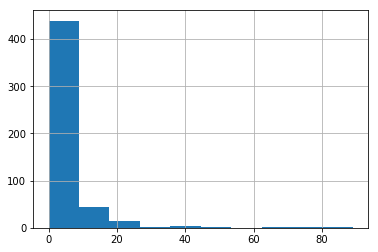

In [24]:
# Individual Numeric Columns: ['crim','zn','indus','nox','rm','age','dis','tax','ptratio','black','lstat','medv']
var_N = 'crim'

df[var_N].hist()
print("Column name: " + var_N)
print("Mean")
print(df[var_N].mean())
print("Max")
print(df[var_N].max())
print("Min")
print(df[var_N].min())
print("Standard Deviation")
print(df[var_N].std())

In [28]:
# Individual Categorical/Binary Columns: ['chas','rad']
var_C = 'rad'

#df[var_C].values
df[var_C].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

### Boston Observations

Insights

<a id="Titanic"></a>
## Titanic

In [7]:
df = titanic

Column name: Parch
Mean
0.38159371492704824
Max
6
Min
0
Standard Deviation
0.8060572211299559


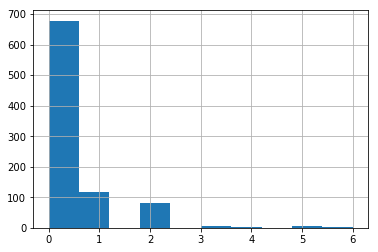

In [8]:
# Individual Numeric Columns: ['Age','Fare','PassengerId','Survived','Pclass']
var_N = 'Parch'

df[var_N].hist()
print("Column name: " + var_N)
print("Mean")
print(df[var_N].mean())
print("Max")
print(df[var_N].max())
print("Min")
print(df[var_N].min())
print("Standard Deviation")
print(df[var_N].std())

In [26]:
# Individual Categorical/Binary Columns: ['Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked''Survived','Pclass']
var_C = 'Pclass'

#df[var_C].values
df[var_C].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Titanic Observations

<a id="Indian"></a>
## Indian Diabetes

In [28]:
df = indians

Column name: glucose
Mean
120.89453125
Max
199
Min
0
Standard Deviation
31.97261819513622


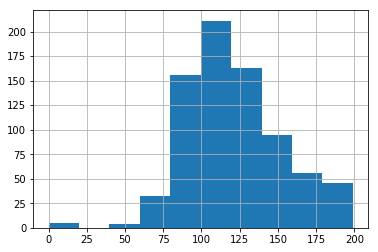

In [29]:
# Individual Numeric Columns: ['glucose','pressure','triceps','insulin','mass','pedigree','age']
var_N = 'glucose'

df[var_N].hist()
print("Column name: " + var_N)
print("Mean")
print(df[var_N].mean())
print("Max")
print(df[var_N].max())
print("Min")
print(df[var_N].min())
print("Standard Deviation")
print(df[var_N].std())

In [33]:
# Individual Categorical/Binary Columns: ['pregnant','diabetes']
var_C = 'pregnant'

#df[var_C].values
df[var_C].value_counts()
#df[var_C].nunique()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64

### Indian Observations

# Decision Tree

In [79]:
df = titanic

In [71]:
# X Variables
independent_keep = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# Y Variable and values
target = ['Survived']
target_levels = ['Died','Survived']
# Categorical is all columns that need to be one hot encoded
categorical_variables = ["Pclass", "Sex", "Embarked"]
# Continuous could be binary as well
continuous_variables = ["Age", "SibSp", "Parch"]

In [54]:
# Prepare data for Modeling

# Remove missing values
df = df.dropna()
df = df.reset_index(drop=True)

#Subset Data by Columns to Keep and Split up X and y matrices
X = df[independent_keep]
y = df[target]

# One-hot encode categorical variables
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(X[categorical_variables])
X_ohed = one_hot_encoder.transform(X[categorical_variables]).toarray()
X_ohed = pd.DataFrame(X_ohed,columns=one_hot_encoder.get_feature_names(categorical_variables))

# Merge one-hot encoded categorical variables with continuous variables
X = pd.concat([X[continuous_variables], X_ohed], axis=1)

In [93]:
# Tree refinement and parameter optimization

# Evaluation function calculating a number of helpful error metrics
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        test_labels, predictions, average='binary')
    accuracy = accuracy_score(y_pred=predictions, y_true=test_labels)
    mcc = matthews_corrcoef(y_pred=predictions, y_true=test_labels)

    print('Model Performance')
    print('Precision = {:0.2f}%.'.format(precision))
    print('Recall = {:0.2f}%.'.format(recall))
    print('F1-Score = {:0.2f}%.'.format(f1_score))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MCC = {:0.2f}%.'.format(mcc))

    return [precision, recall, f1_score, accuracy, mcc]

# Split data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Use a grid search over a specified range of possible hyperparameter values
parameters = {
    'max_depth': range(3, 15),
    #'ccp_alpha': np.arange(0, .2, .01),
    #'min_samples_leaf': range(2, 15),
    #'min_samples_split': range(1, 15),
    #'criterion': ['gini','entropy']
}

# Run grid search over hyperparameter ranges
classifier = GridSearchCV(tree.DecisionTreeClassifier(),
                          parameters,
                          cv=10,
                          n_jobs=-1)
classifier.fit(X=X_train, y=y_train)

# Extract best CV model and print its accuracy measure
cv_best_model = classifier.best_estimator_
print("Best CV accuracy: {}, with parameters: {}".format(
    classifier.best_score_, classifier.best_params_))

# Evaluate best CV model on holdout test set
precision, recall, f1_score, accuracy, mcc = evaluate(
    cv_best_model, X_test, y_test)

Best CV accuracy: 0.7666666666666666, with parameters: {'max_depth': 11}
Model Performance
Precision = 0.89%.
Recall = 0.84%.
F1-Score = 0.86%.
Accuracy = 0.82%.
MCC = 0.59%.


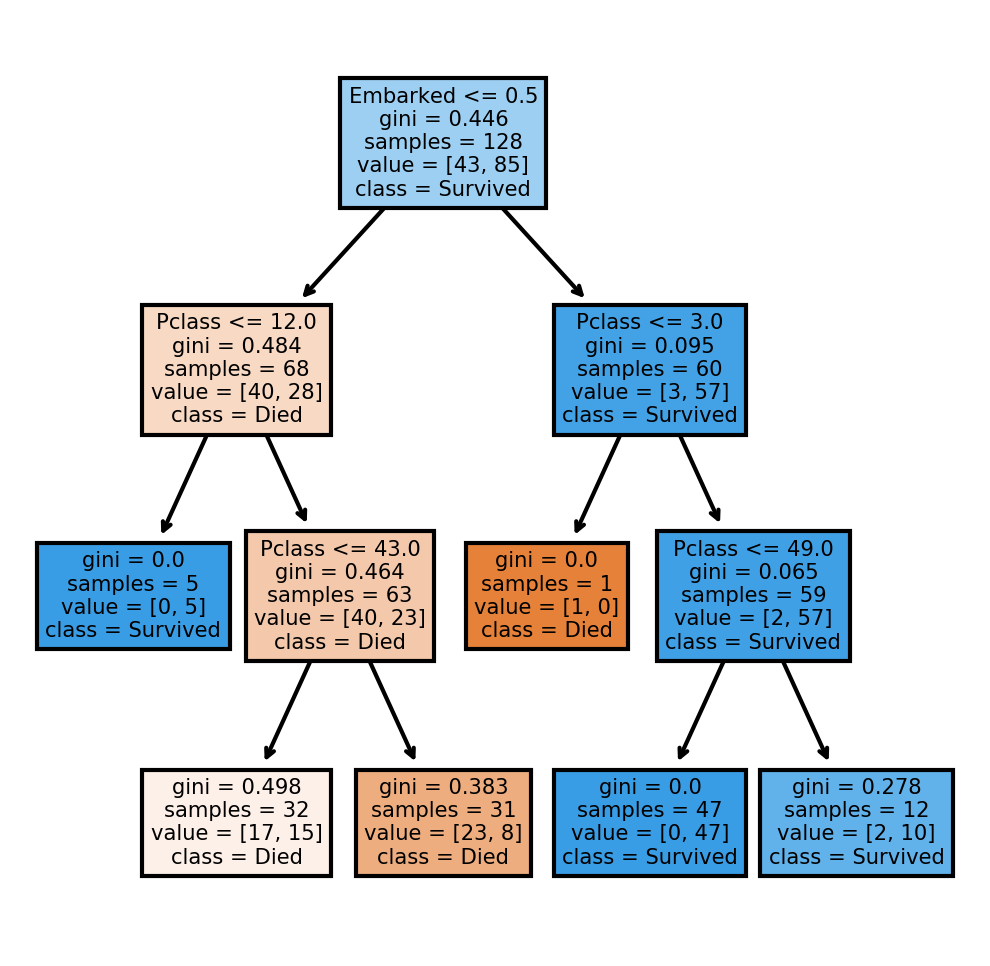

In [72]:
# Visualize Decision Tree
fn=independent_keep
cn=target_levels
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(cv_best_model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [78]:
# Display confusion Matrix of Decision Tree Prediction
cn=target_levels
pred = cv_best_model.predicted()

pred = predict(X_test,)
#cm = confusion_matrix(y_test, pred, cn)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar()#(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted by Model')
plt.ylabel('Real Life')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'predicted'

In [47]:
# More Complicated Confusion Matrix
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Random Forest

In [50]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    r2 = r2_score(y_pred=predictions, y_true=test_labels)

    print('Model Performance')
    print('R2 = {:0.2f}%.'.format(r2))

    return [r2]

In [ ]:
# %%
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Data\\DSDP\\"

indians = pd.read_csv(str(filepath)+"PimaIndiansDiabetes.csv")    

boston_Continuous = ['crim','zn','indus','nox','rm','age','dis','tax','ptratio','black','lstat','medv']
boston_Categorical = ['chas','rad']

X = boston.drop(columns=["diabetes"])
y = boston["diabetes"]

titanic_Continuous = ['Age','Fare']
titanic_Categorical = ['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked']

#indians_Continuous = ['glucose','pressure','triceps','insulin','mass','pedigree','age']
#indians_Categorical = ['pregnant','diabetes']

#X = indians.drop(columns=["diabetes"])
#y = indians["diabetes"]

In [ ]:
# Split data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)

In [ ]:
rf = RandomForestRegressor()

# Create the parameter grid based on the results of random search
# This section can be modified to look into other possible parameters.
param_grid = {
    'max_depth': [80, 90],  # , 100, 200, None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': [10, 50, 100]  # , 200, 300, 500, 1000]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,  # parameters to be tuned
                           cv=10,
                           n_jobs=-1,  # -1 means use all available cores
                           verbose=2)

# Perform CV search over grid of hyperparameters
grid_search.fit(X_train, y_train)

print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search.best_score_, grid_search.best_params_))

best_model = grid_search.best_estimator_
r2 = evaluate(best_model, X_test, y_test)

# Now that we know the best hyperparameter, we refit our RF model
# using them and the full dataset at our disposal
full_model = RandomForestClassifier(**best_params)
full_fit = full_model.fit(X, y)


In [ ]:
# Variable Importance Bar Graph

feature_importance=pd.DataFrame({
    'rf':rf.feature_importances_,
    'dt':dt.feature_importances_
},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rf'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

# Bin

In [97]:
# Create classifier with default tree pruning hyperparameters and fit to data
classifier_def = tree.DecisionTreeClassifier()
classifier_def.fit(X, y)
pred = classifier_def.feature_importances_
# Takes a second to generate the tree
# Note the difference in default cp value in sklearn (0.0) resulting in a full tree
#tree_plot_def = tree.plot_tree(classifier_def)

# Modulate the complexity parameter to result in a far smaller tree
# Experiment with different tree parameters using the definitions here:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#classifier_cp = tree.DecisionTreeClassifier(ccp_alpha=0.01)
#classifier_cp.fit(X, y)
#tree_plot_cp = tree.plot_tree(classifier_cp)


#fn=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#cn=["Died","Survived"]
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#tree.plot_tree(classifier_cp,
#               feature_names = fn,
#               class_names=cn,
#               filled = True);

In [98]:
pred

array([0.55952117, 0.02006395, 0.08287299, 0.00448639, 0.00847575,
       0.00847575, 0.        , 0.29067674, 0.01271363, 0.        ,
       0.01271363])